# Question 1

The discount function is $P(0,1)$ $=$ $0.9724$, $P(0,1.25)$ $=$ $0.9651$, $P(0,1.5)$ $=$ $0.9575$, and $P(0.1.75)$ $=$ $0.9497$. Now consider the forward rate for a $forward$ $rate$ $agreement$ $(FRA)$ that exchanges a fixed forward rate for a $3-month$ interest rate observed at date $T$ where the exchange occurs at date $T+1/4$. What is the no-arbitrage forward rate, $f_0(T,T+∆t)$, if $T$ $=$ $1.25$ and $∆t$ $=$ $0.25$?

State your answer as a percentage rate to $3$ decimal places, e.g., $2.428$ .

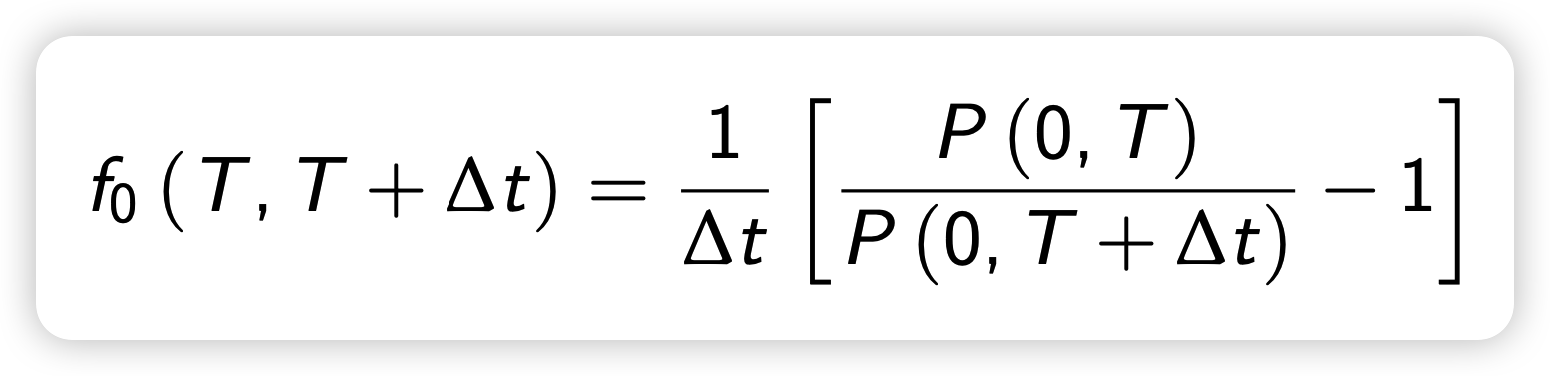

In [4]:
def P(a, b):
    if a == 0 and b == 1:
        return 0.9724
    elif a == 0 and b == 1.25:
        return 0.9651
    elif a == 0 and b == 1.5:
        return 0.9575
    else: 
        return 0.9497 


T = 1.25
Δt = 0.25

def f0(a, b):
    return (1/Δt) * (P(0, a) / P(0, b) - 1)

print(str(f0(T, T+Δt)*100)+"%")

3.174934725848555%


# Question 2

Based on the discount function in Question 1, what is the Black model value of a caplet with a notional principal of $\$40$ million that is written on the $3-month$ interest rate with a cap rate of $3.50\%$, where $T=1.25$, and where the volatility of the underlying forward rate is $v_T = 0.3$?

State your answer in dollars to the nearest $\$100$, e.g., $58,400$ .

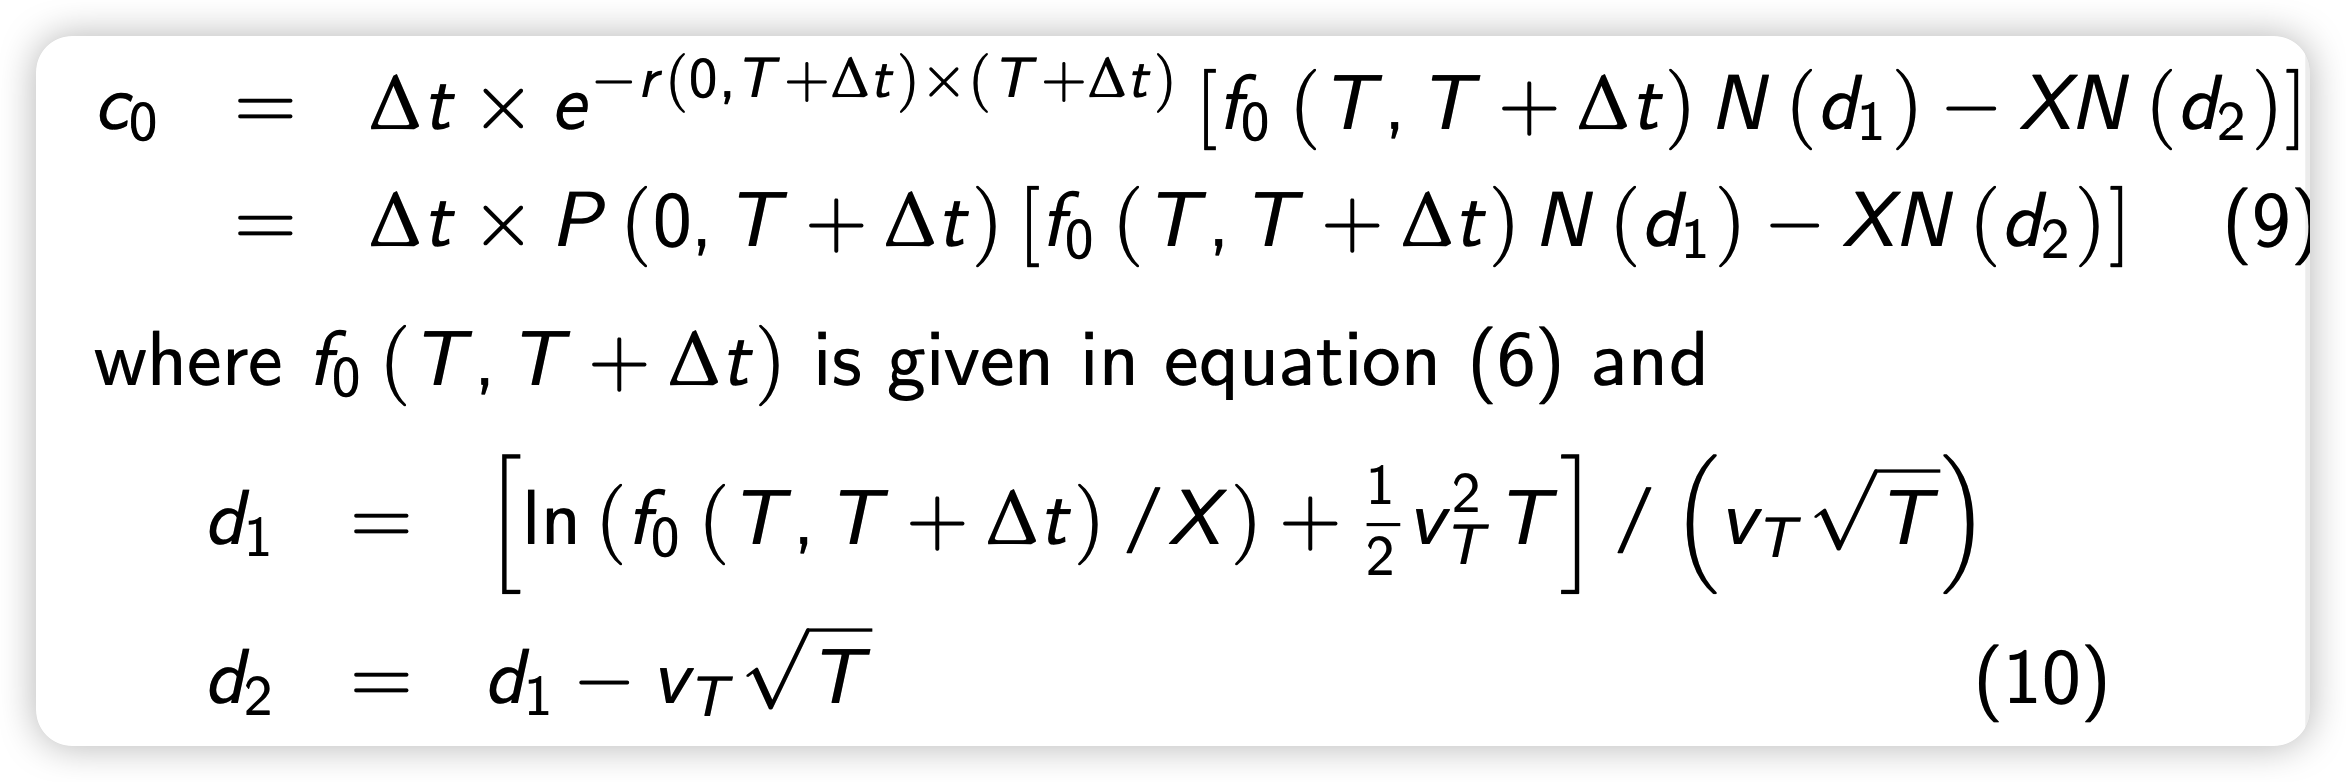

In [36]:
import scipy
from scipy.stats import norm
import math
from math import sqrt, exp, log

def P(a, b):
    if a == 0 and b == 1:
        return 0.9724
    elif a == 0 and b == 1.25:
        return 0.9651
    elif a == 0 and b == 1.5:
        return 0.9575
    else: 
        return 0.9497 
    
def f0(a, b):
    return (1/Δt) * (P(0, a) / P(0, b) - 1)

N = 40000000.0
T = 1.25
vt = 0.3
Δt = 0.25
X = 0.035

def c0(a, b):
    d1 = (log(f0(a,b)/X) + 0.5*vt**2*T) / (vt * sqrt(T))
    d2 = d1 - vt*sqrt(T)
    return Δt * P(0,b) * (f0(a, b) * norm.cdf(d1) - X * norm.cdf(d2))

def NC0(a, b):
    return N * c0(a, b)

print(NC0(T, T+Δt))


28764.68690233641


# Question 3

A corporation has just borrowed $\$60$ million in the form of an $8-year$ syndicated loan that makes quarterly payments equal to $3-month$ LIBOR plus $4.00\%$. If the firm wishes to limit the interest it pays each quarter to have a maximum of $\$1.5$ million and a minimum of $\$900,000$ it should buy a collar with 

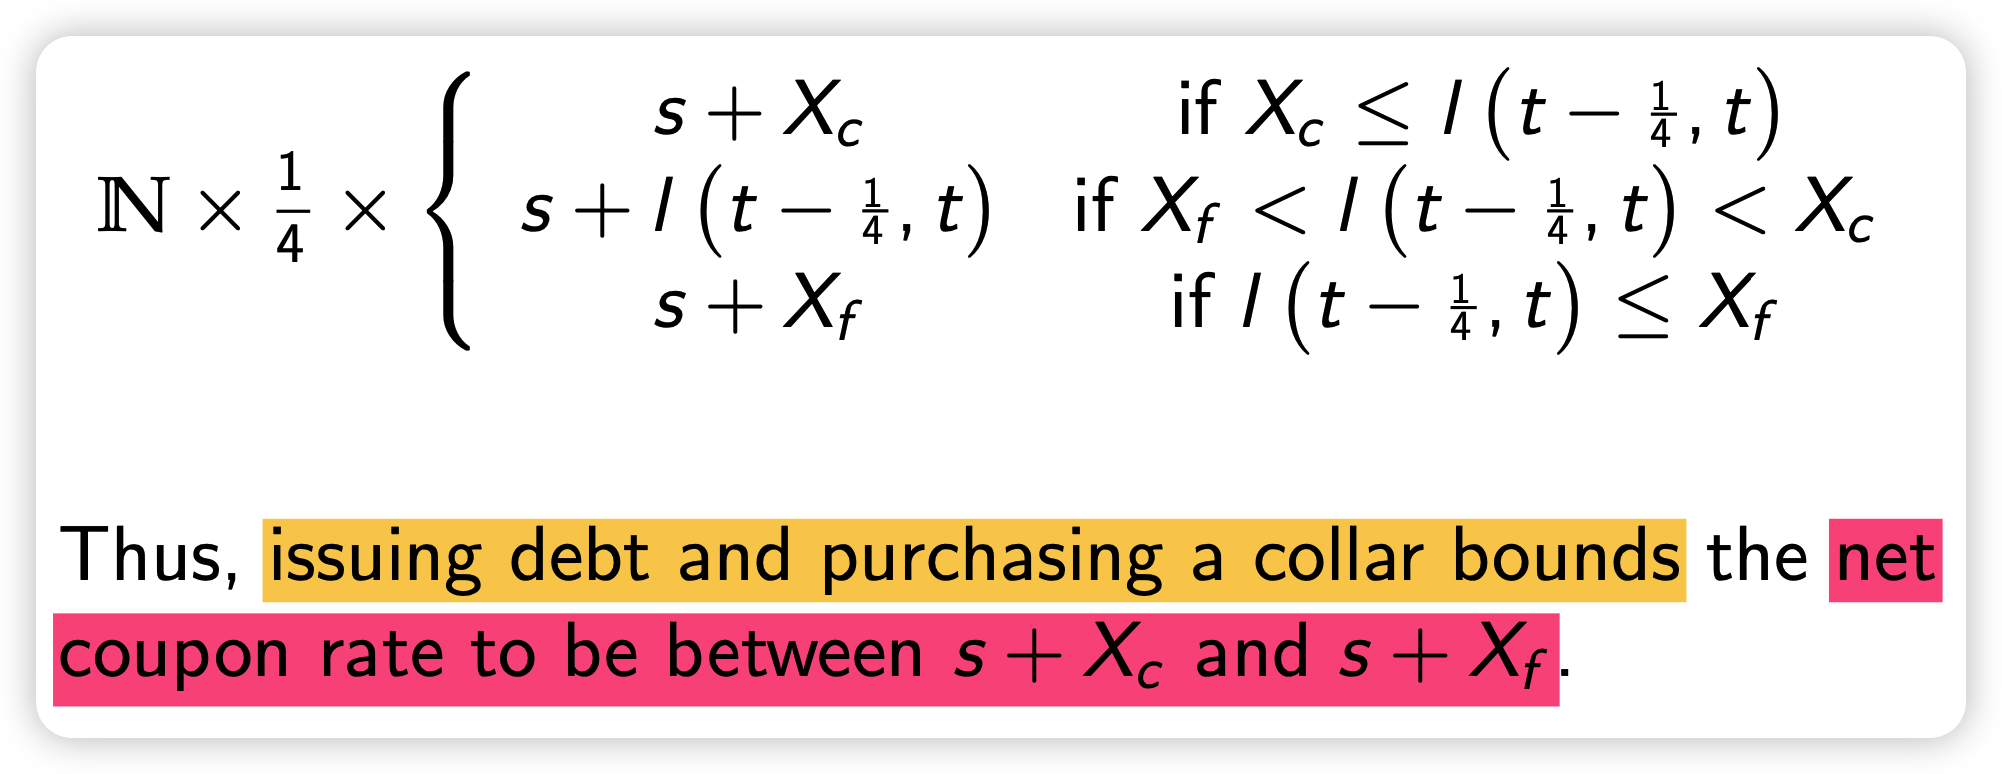

In [39]:
N = 60000000
t = 8
m = 4
Δt = 0.25
s = 0.04
maximum = 1500000
minimum = 900000

Xc = maximum / (N * (1/m)) - s
Xf = minimum / (N * (1/m)) - s

print("Xf =", round(Xf, 4), ", ", "Xc = ", round(Xc, 4))

Xf = 0.02 ,  Xc =  0.06


# Question 4

The current swap rate on a $10-year$ interest swap making quarterly exchanges based on $3-month$ LIBOR is $2.00\%$. 

A $10-year$ interest rate cap based on $3-month$ LIBOR with a cap rate of $2.00\%$ and a notional principal of $\$10$ million is currently worth $\$500,000$. 

What is the current value of a $10-year$ interest rate floor based on $3-month$ LIBOR with a floor rate of $2.00\%$?

State your answer in dollars to the nearest $\$1,000$, e.g. $376,000$ . 

In [1]:
N = 10000000
def P(tm):
    return (1+0.02/4)**(-4 * tm)
Vswap = N * (1 - P(10))
Vcap = 500000
Vfloor = Vcap - Vswap
print(Vswap)
print(int(round(Vfloor, -3)))

1808611.3932041181
-1309000
